# Text Classification - Airline Tweets

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

In [6]:
from sklearn.pipeline import Pipeline

## Import Dataset

In [7]:
df = pd.read_csv('airline_tweets.csv')

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [10]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


## Exploratory Data Analysis

<Axes: xlabel='airline_sentiment', ylabel='count'>

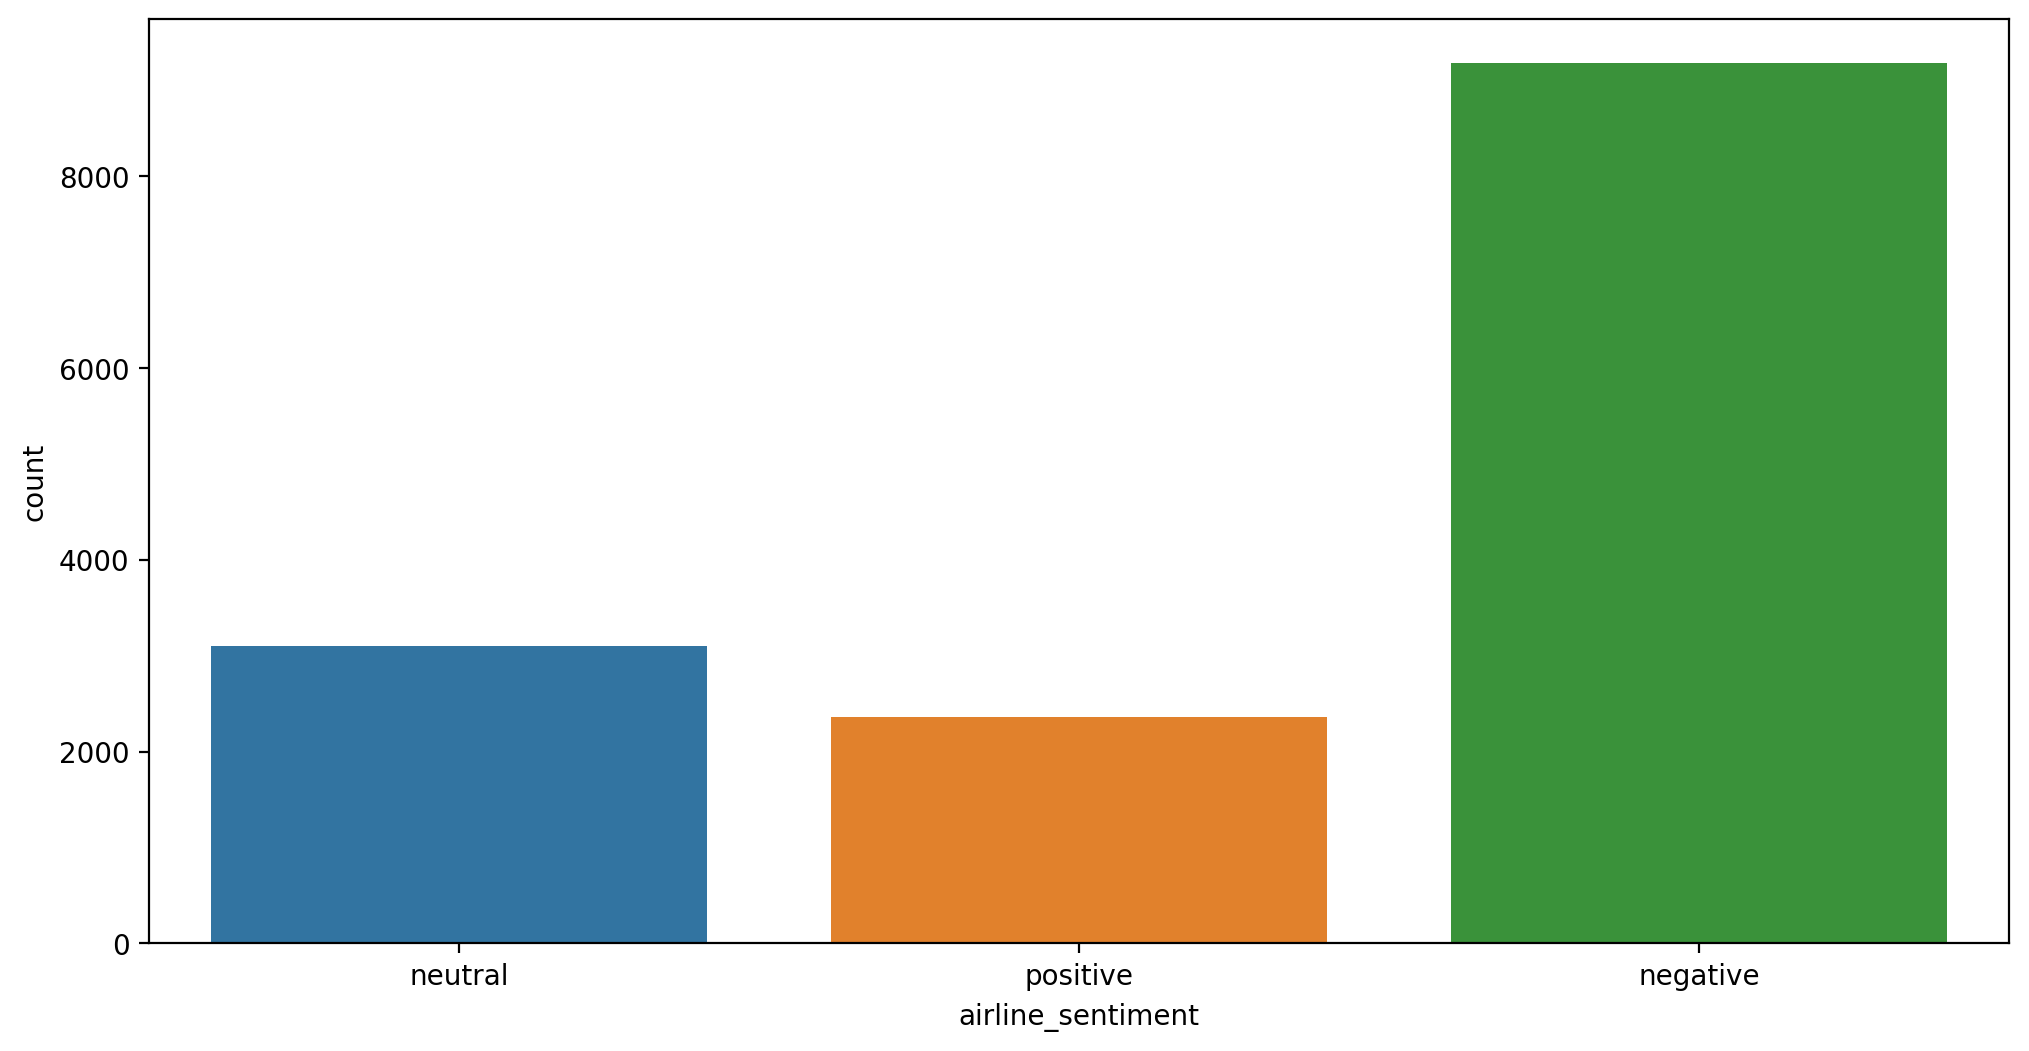

In [11]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='airline_sentiment')

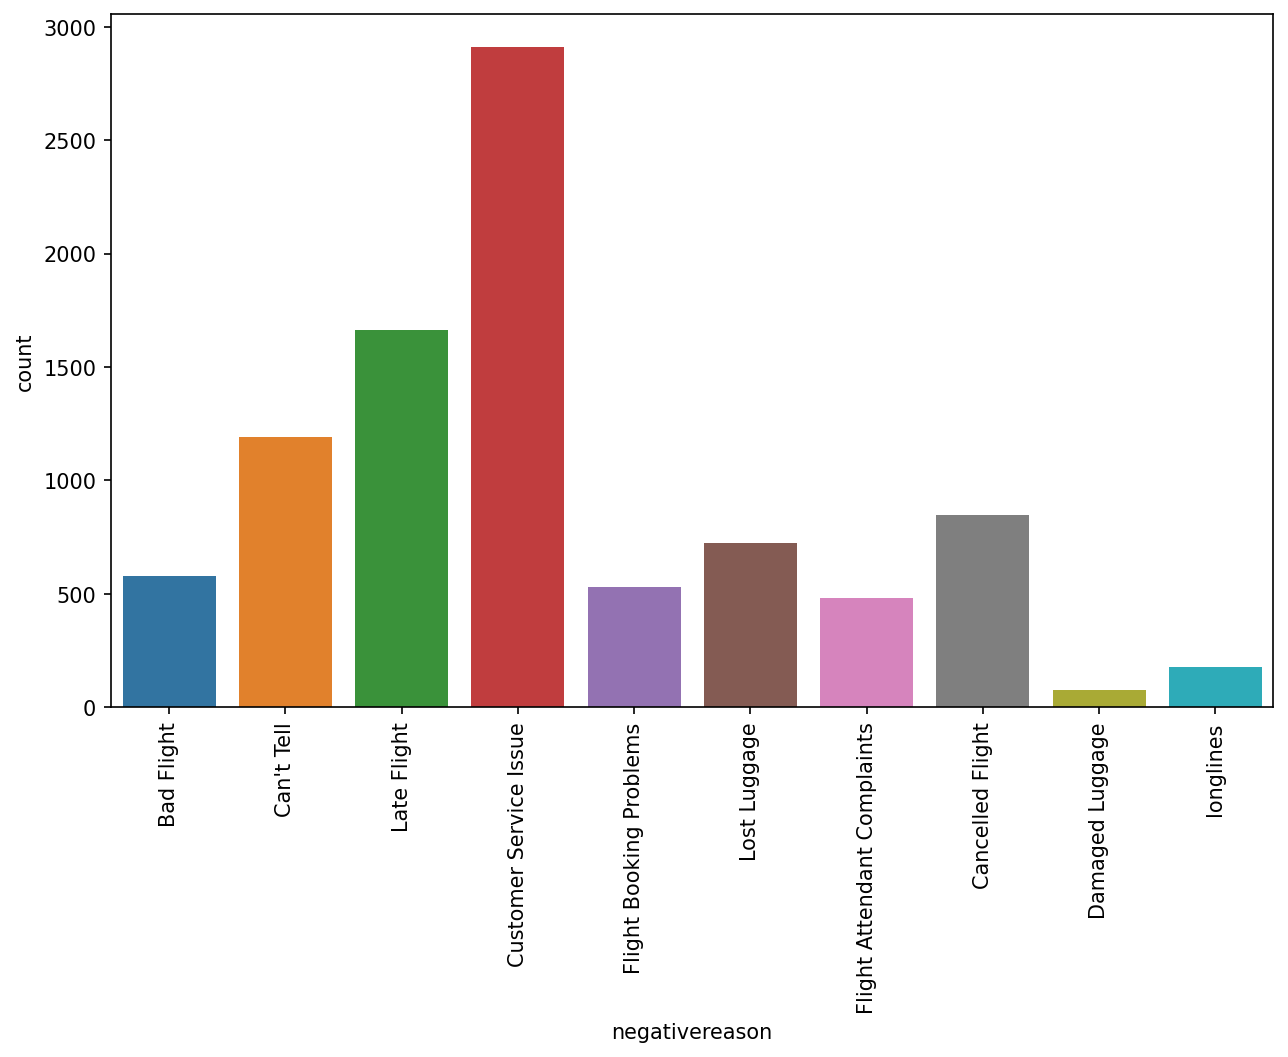

In [12]:
plt.figure(figsize=(10,6), dpi=150)
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

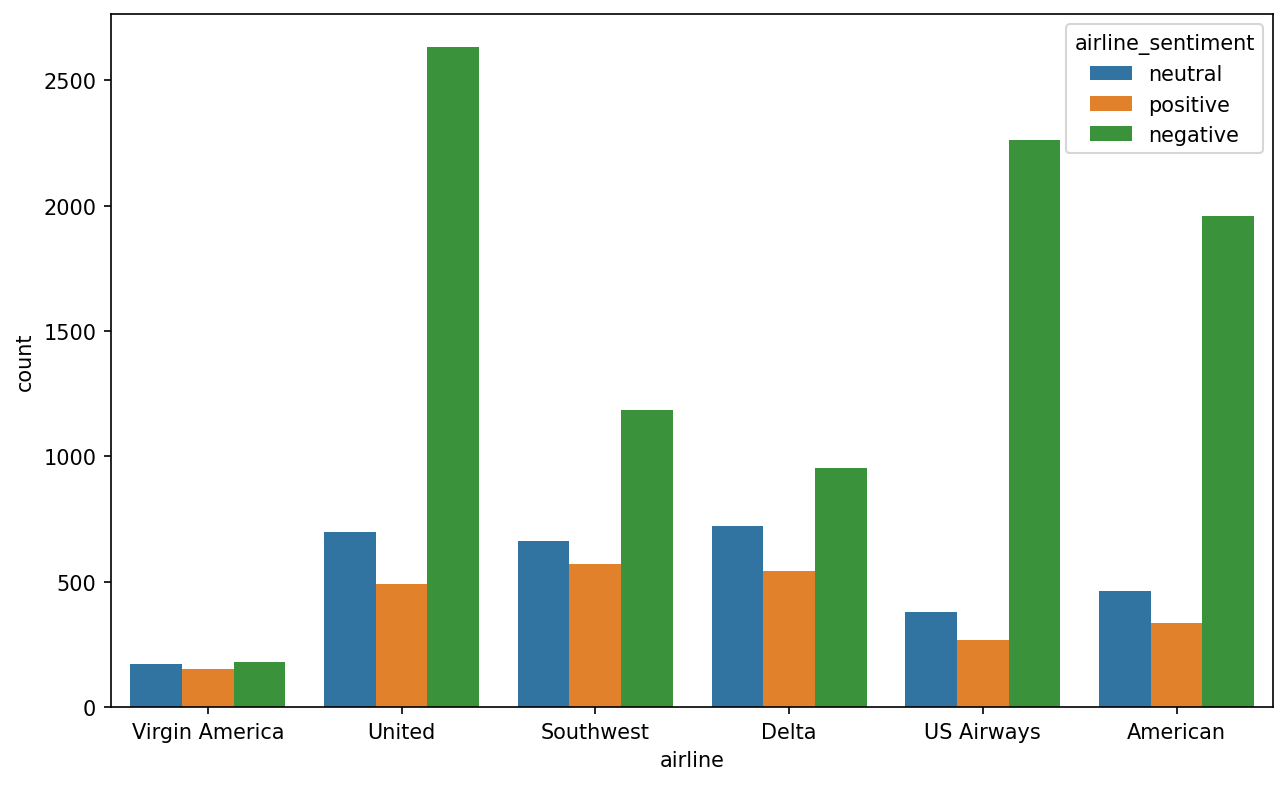

In [13]:
plt.figure(figsize=(10,6), dpi=150)
sns.countplot(data=df, x='airline', hue='airline_sentiment')

## Separating out Data

In [14]:
data = df[['airline_sentiment', 'text']]

In [15]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


data.info()

In [16]:
X = data['text']
y = data['airline_sentiment']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Vectorization

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')

In [19]:
X_train_vectorizer = vectorizer.fit_transform(X_train)

In [20]:
X_test_vectorizer = vectorizer.transform(X_test)

## Building Model

### Naive Bayes

In [21]:
naive_bayes = MultinomialNB()

In [22]:
naive_bayes.fit(X_train_vectorizer, y_train)

MultinomialNB()

### Logistic Regression

In [23]:
logistic_regression = LogisticRegression(max_iter=1000)

In [24]:
logistic_regression.fit(X_train_vectorizer, y_train)

LogisticRegression(max_iter=1000)

### Support Vector Machine

In [25]:
support_vector = SVC()
support_vector.fit(X_train_vectorizer, y_train)

SVC()

### Linear Support Vector

In [26]:
linear_support_vector = LinearSVC()
linear_support_vector.fit(X_train_vectorizer, y_train)

C:\Users\tariq\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

## Evaluation

In [27]:
def report(model):
    predictions = model.predict(X_test_vectorizer)
    
    print(classification_report(y_test, predictions))
    
    matrix = confusion_matrix(y_test, predictions, labels=model.classes_)
    confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    print(confusion_matrix_plot.plot())

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



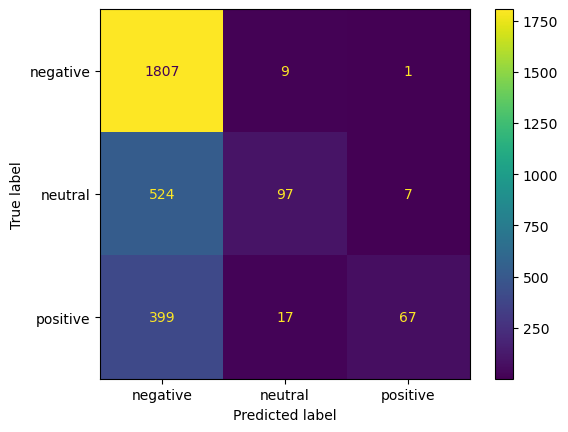

In [28]:
report(naive_bayes)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



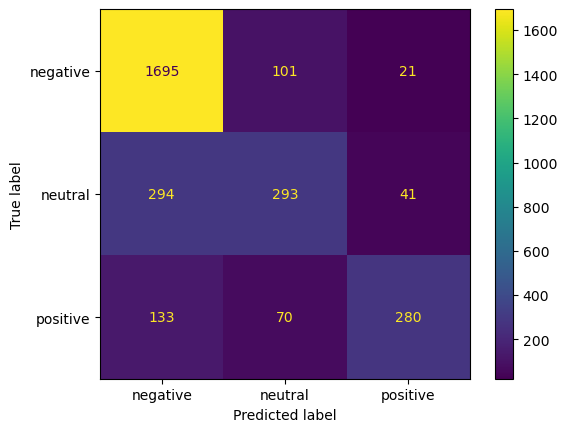

In [29]:
report(logistic_regression)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



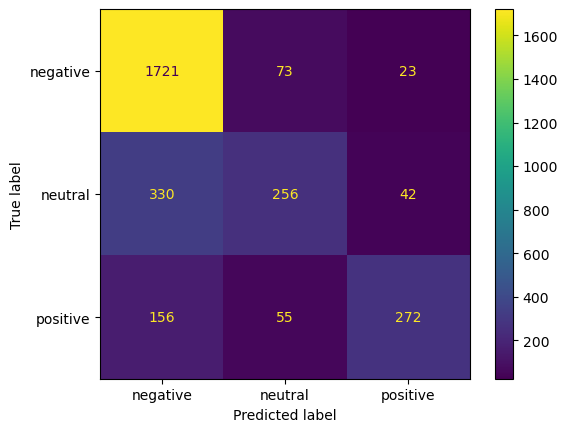

In [30]:
report(support_vector)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



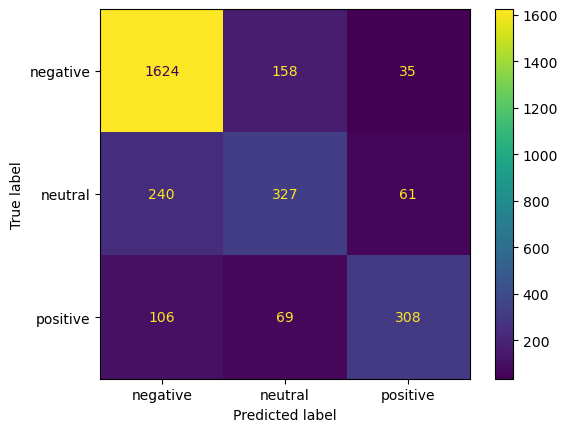

In [31]:
report(linear_support_vector)

## Building Pipeline

In [32]:
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC())
])

In [33]:
model_pipeline.fit(X, y)

C:\Users\tariq\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [34]:
model_pipeline.predict(['good flight'])

array(['positive'], dtype=object)

In [35]:
model_pipeline.predict(['bad flight'])

array(['negative'], dtype=object)

In [36]:
model_pipeline.predict(['normal flight'])

array(['neutral'], dtype=object)